In [1]:
from collections import defaultdict, Counter
import json
import re
import numpy as np
import requests
import matplotlib.pyplot as plt 

def load_separate_and_clean_stories(filename):
    with open(filename, 'r') as file:
        content = file.read()

    stories = content.split('\n\n\n\n')

    cleaned_stories = []
    for story in stories:
        cleaned_story = re.sub(r'\n\s*\n', '\n', story.strip())
        cleaned_stories.append(cleaned_story)
    
    return cleaned_stories

In [2]:
filename = "dataset/merged_clean.txt"
print(filename)
dataset = load_separate_and_clean_stories(filename)
print('Length dataset:',str(len(dataset)))
l = re.split('[' ', ;, \., :, \n, \t]' , ' '.join(dataset))                                                                                                                                                                                                                                                                                                                                          
l = [x for x in l if x]
c = Counter(l)
print('Number of different words:',str(len(c)))


dataset/merged_clean.txt
Length dataset: 1215
Number of different words: 58558


In [24]:
stories = {}
sents = []
ws = []
inws = []
for i in range(len(dataset)):                                                                                                                                                                                            
    l = re.split('[' ', ;, \., :, \n, \t]' , dataset[i])                                                                                                                                                                                                                                                                                                                                          
    l = [x for x in l if x]
    c = Counter(l)
    stories[i] = {'story':dataset[i],
                  '#sentences':dataset[i].count('.')+dataset[i].count('?')+dataset[i].count('!'),
                  '#words':len(l),
                  '#individual words': len(c)
                 }
    sents.append(stories[i]['#sentences'])
    ws.append(stories[i]['#words'])
    inws.append(stories[i]['#individual words'])

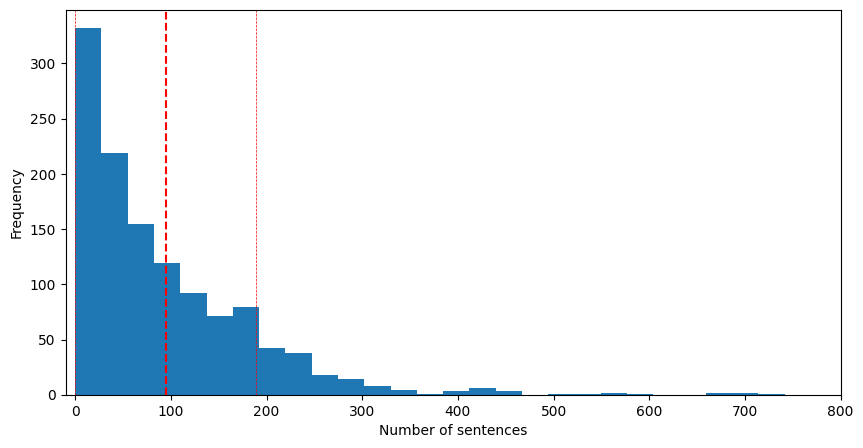

In [36]:
counts, bins = np.histogram(sents,100)

plt.figure(figsize = (10,5))

plt.hist(bins[:-1], bins, weights=counts) # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Number of sentences');
plt.axvline(np.mean(sents),color='r',linestyle='--')
plt.axvline(np.mean(sents)-np.mean(sents),color='r',linestyle='--',linewidth=0.5)
plt.axvline(np.mean(sents)+np.mean(sents),color='r',linestyle='--',linewidth=0.5)

plt.xlim([-10,800]);

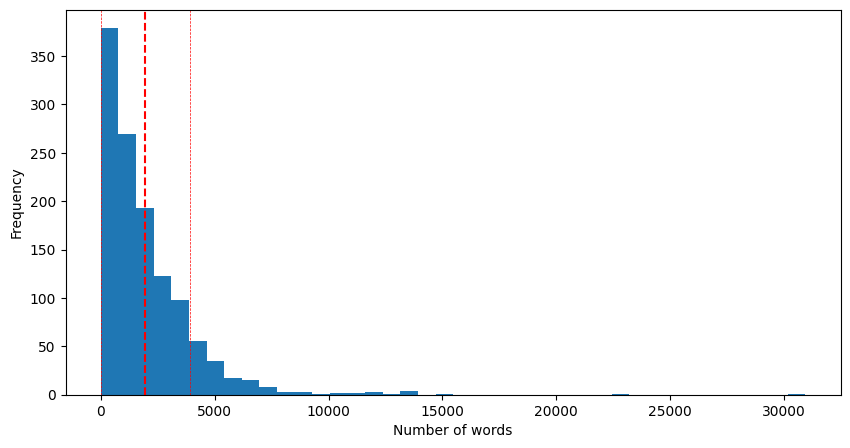

In [38]:
counts, bins = np.histogram(ws,40)

plt.figure(figsize = (10,5))

plt.hist(bins[:-1], bins, weights=counts) # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Number of words');
plt.axvline(np.mean(ws),color='r',linestyle='--')
plt.axvline(np.mean(ws)-np.mean(ws),color='r',linestyle='--',linewidth=0.5)
plt.axvline(np.mean(ws)+np.mean(ws),color='r',linestyle='--',linewidth=0.5)

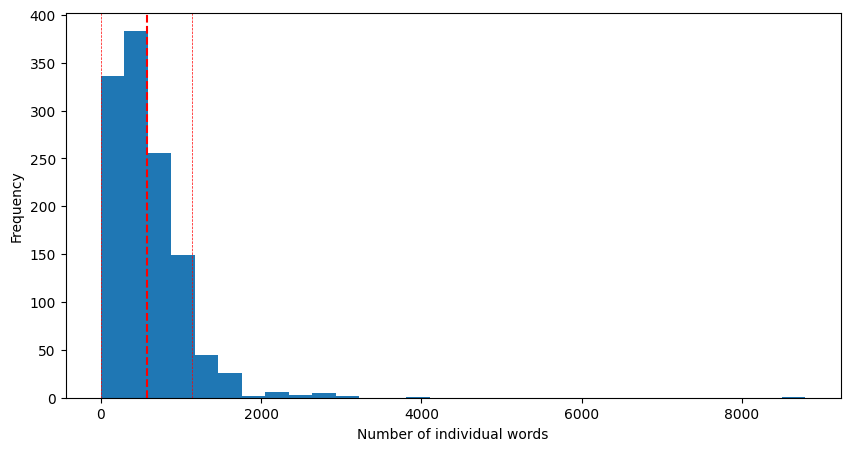

In [39]:
counts, bins = np.histogram(inws,30)

plt.figure(figsize = (10,5))

plt.hist(bins[:-1], bins, weights=counts) # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Number of individual words');
plt.axvline(np.mean(inws),color='r',linestyle='--')
plt.axvline(np.mean(inws)-np.mean(inws),color='r',linestyle='--',linewidth=0.5)
plt.axvline(np.mean(inws)+np.mean(inws),color='r',linestyle='--',linewidth=0.5)